In [ ]:
Plot statistic data for closeness and throughput for a given link

In [22]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 15})

In [38]:
link='CERN-PROD:SARA-MATRIX'
# 1 day, 2 days, 7 days, 15 days, 21 days and 30 days
wins = [24, 48, 168, 360, 504, 720]

In [39]:
import pandas as pd
import numpy as np
import time
import os
import math

opendataset = pd.read_json

ts = time.time()
src, dst = link.split(':')
df = opendataset('windata/closeness--%s__%s--.json' % (src,dst))
allt = opendataset('allthroughputs.json')
x = df[link].keys()
windows = {}
for k in wins:
    windows[k] = []
for date in x:
    for w in wins:
        windows[w].append(df[link][date][str(w)])
print 'Done'

Done


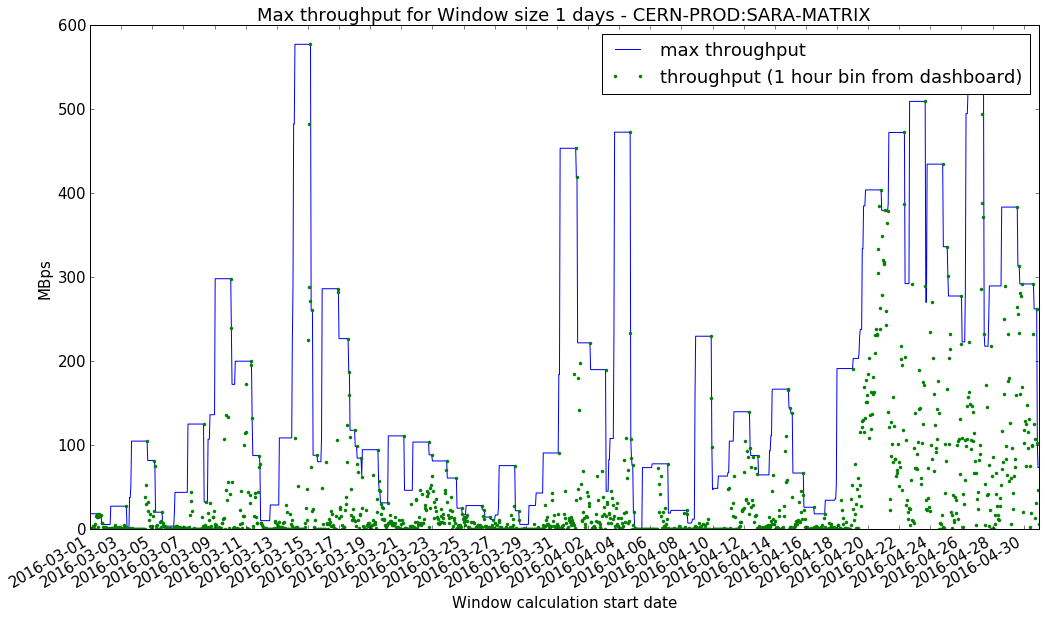

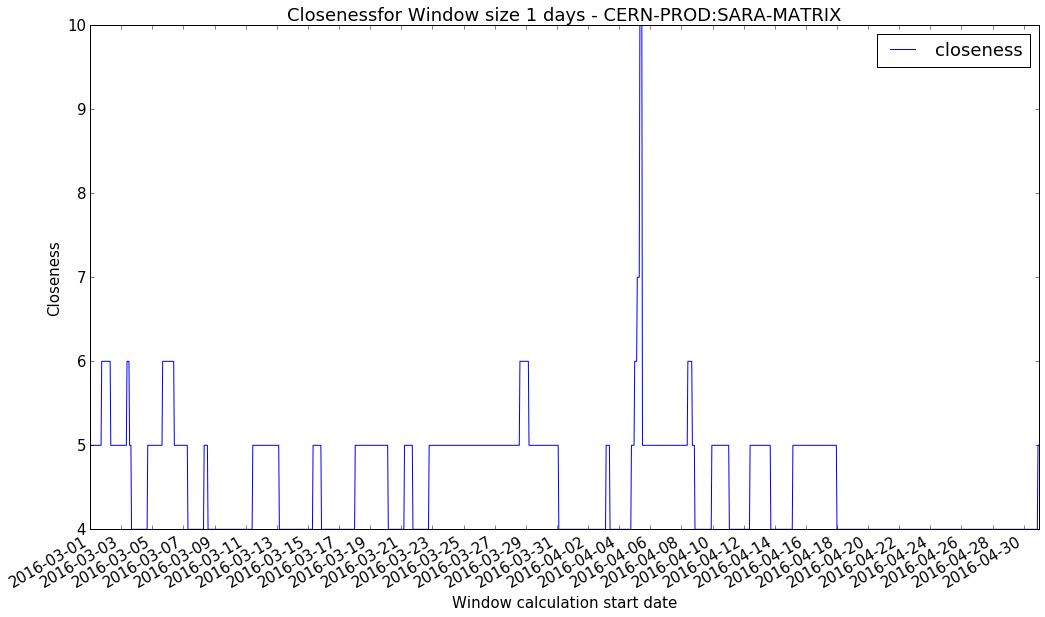

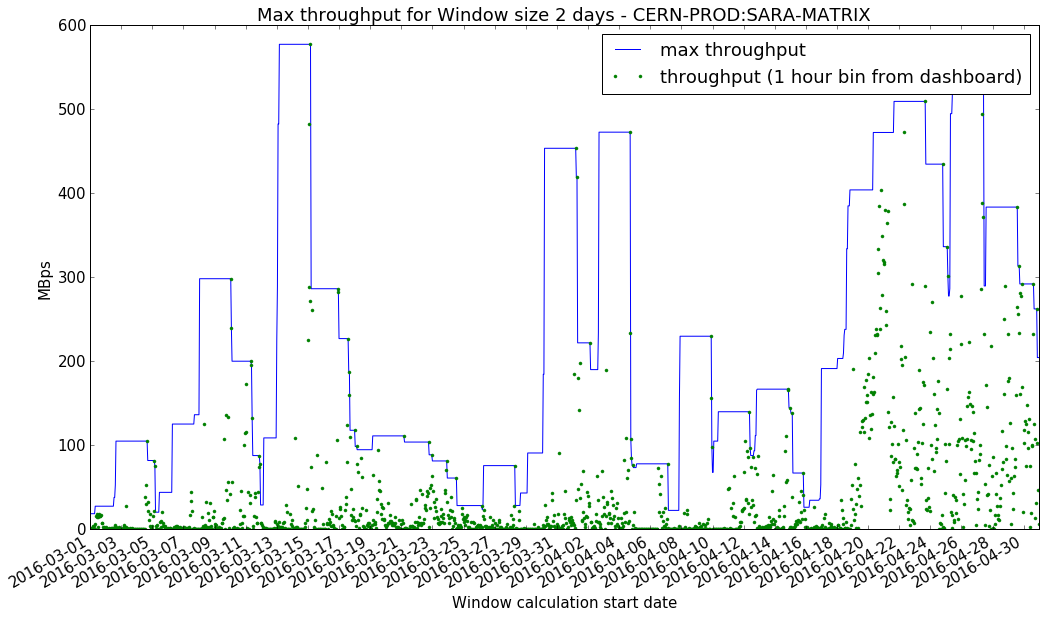

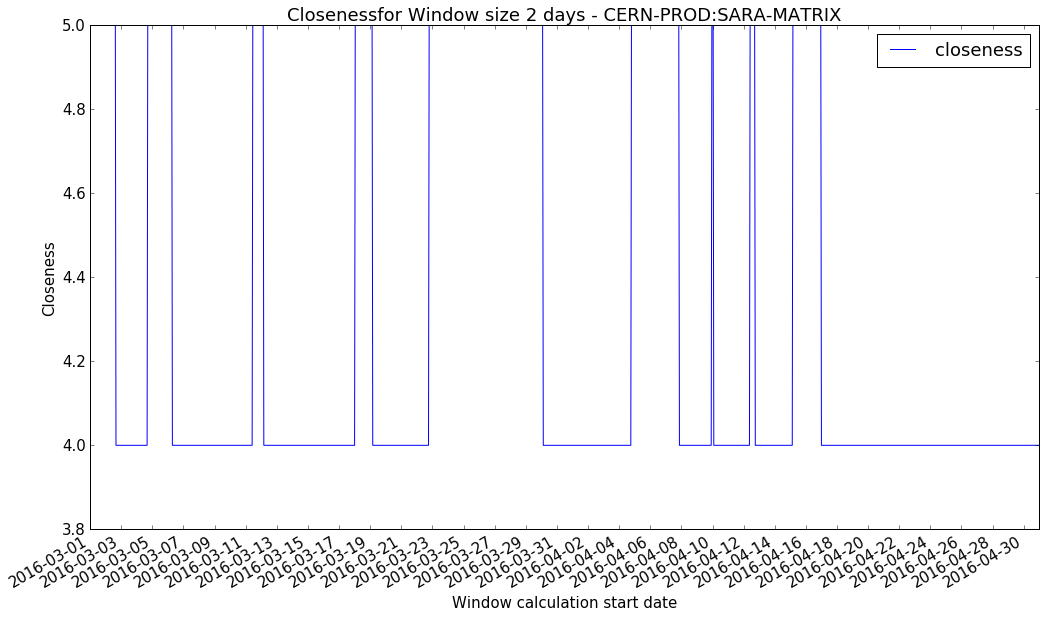

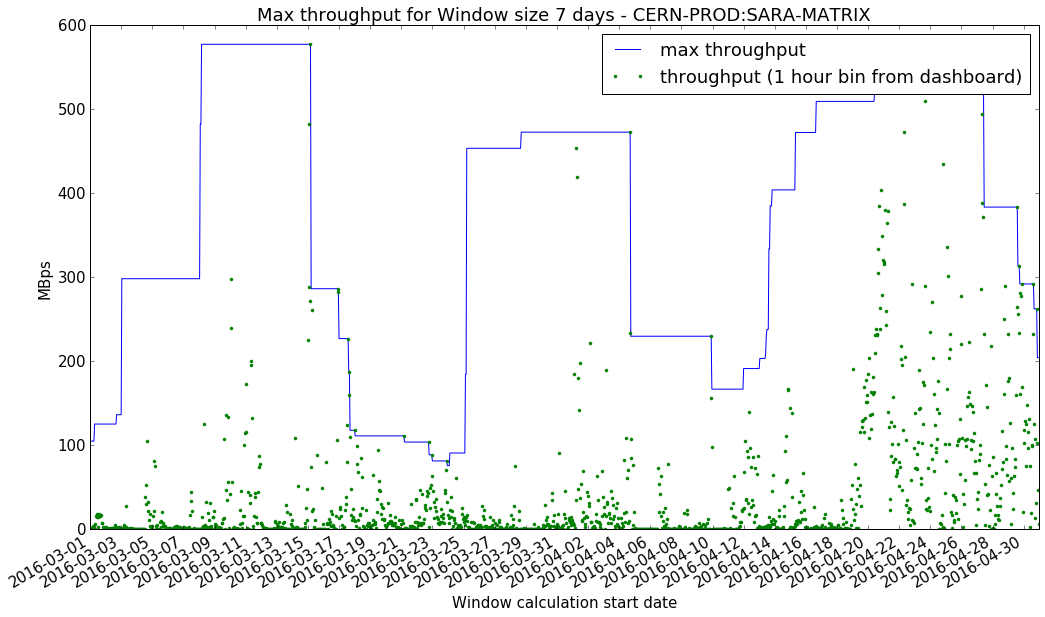

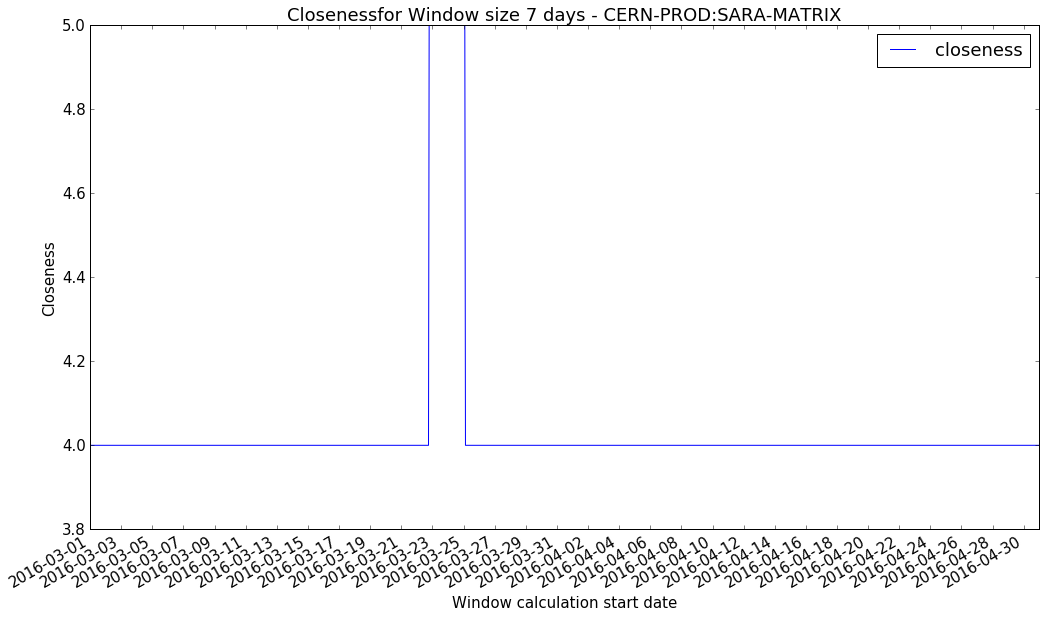

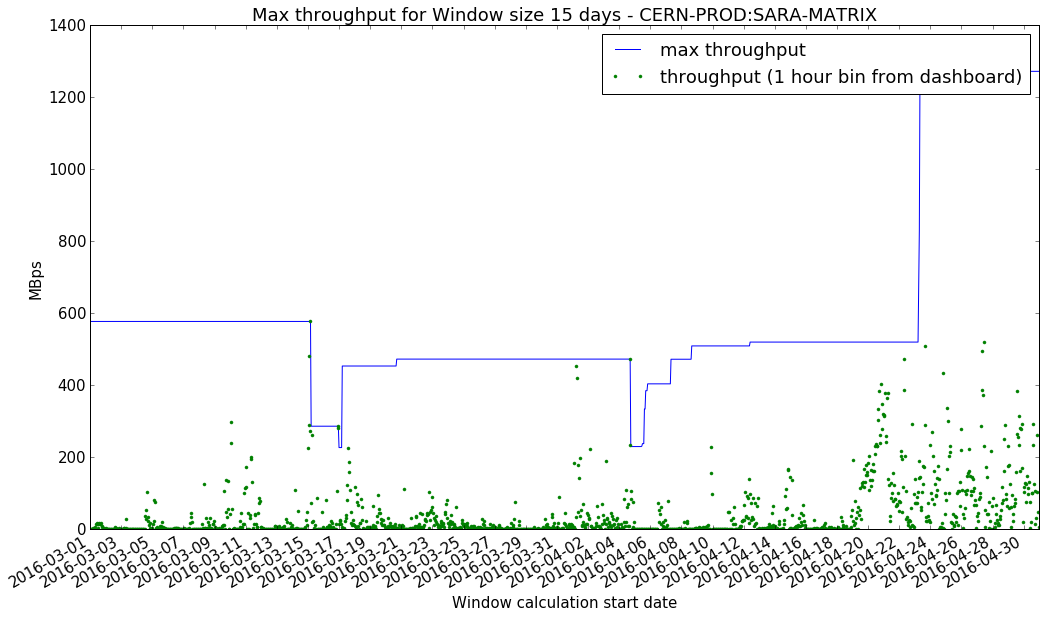

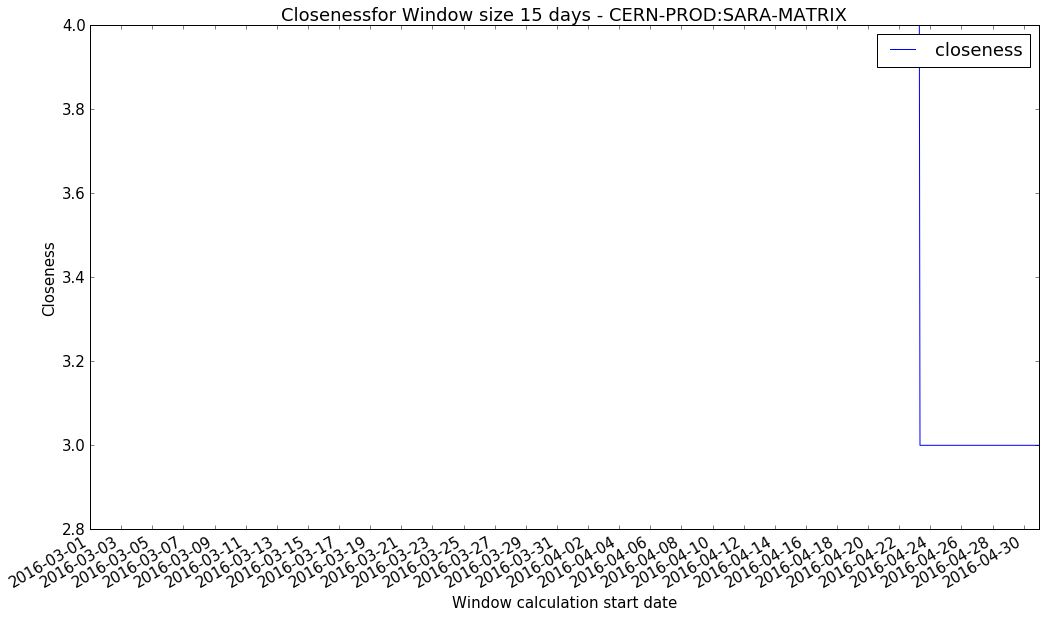

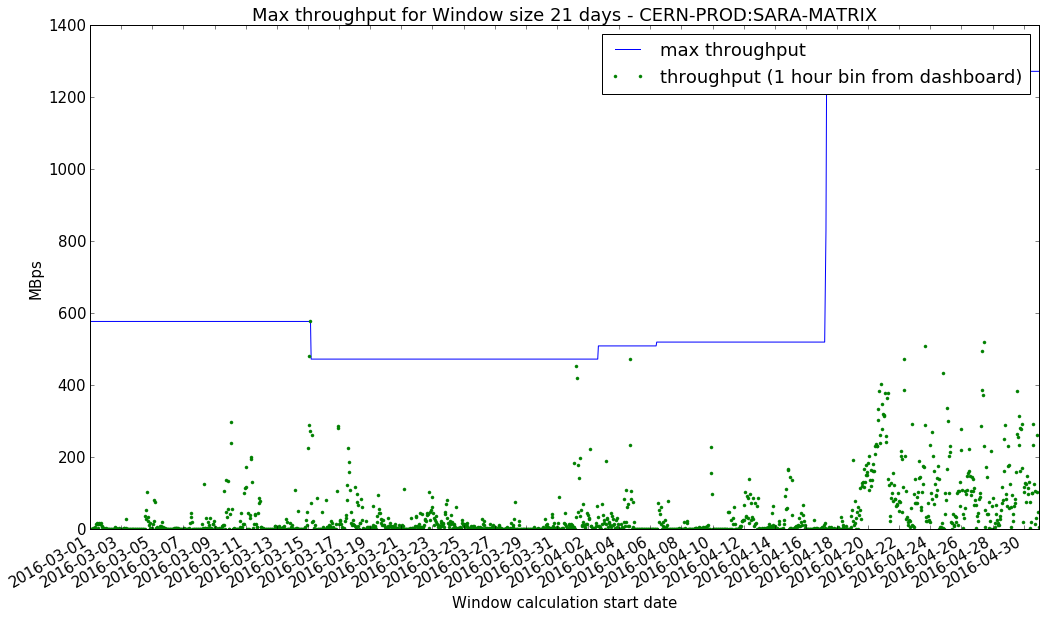

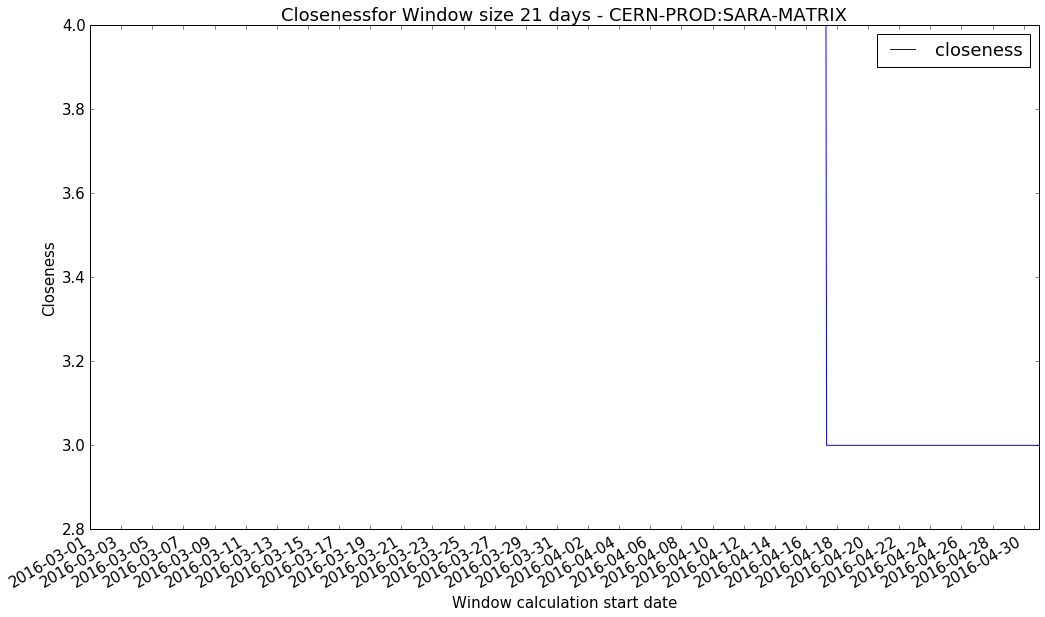

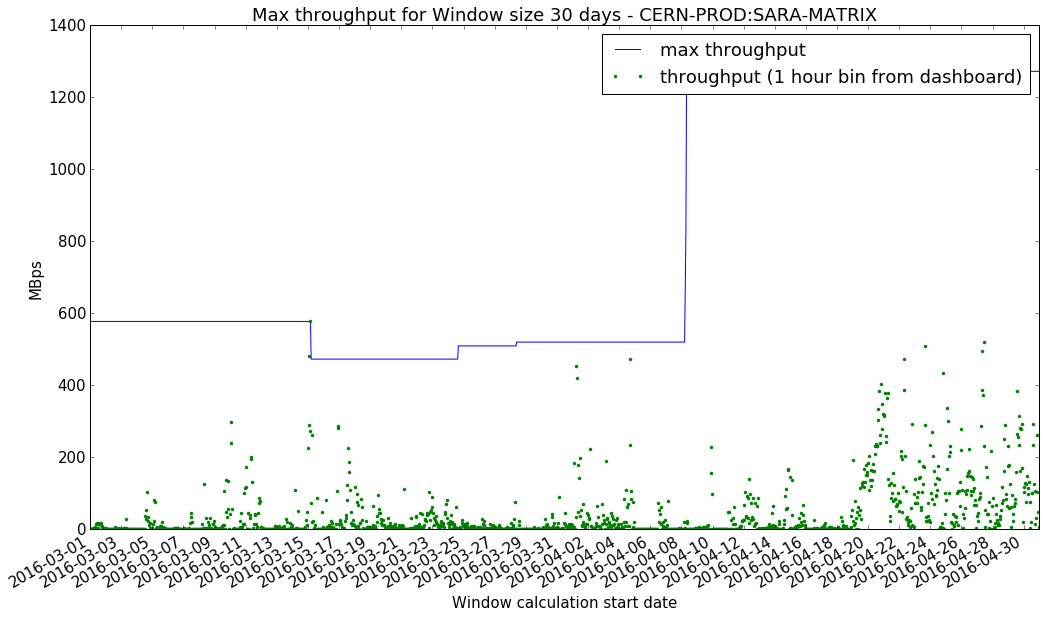

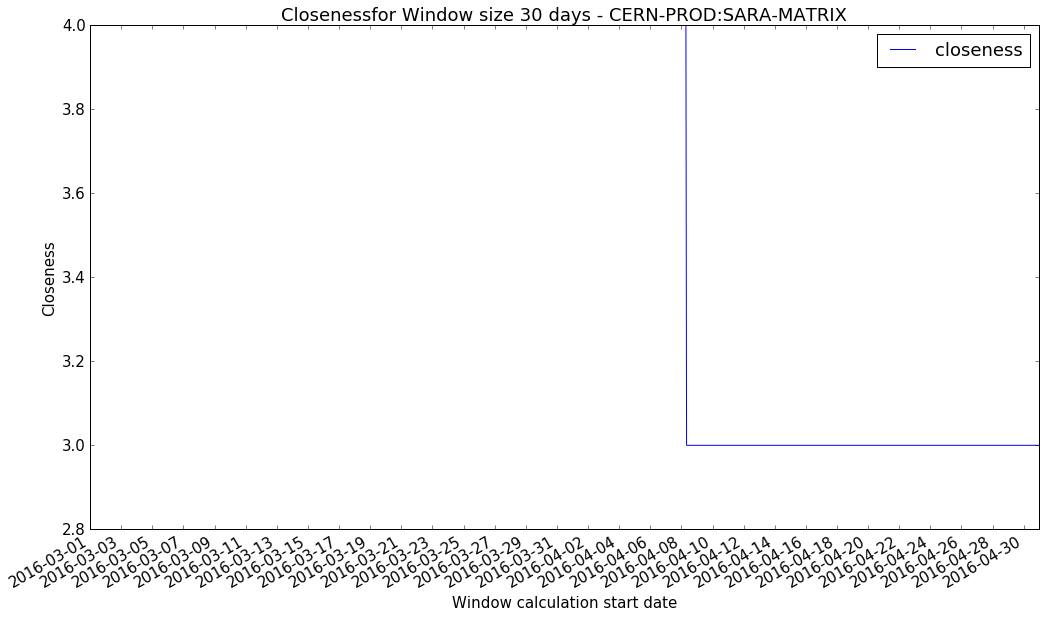

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as dt

realthr = allt[link][x[0]:x[-1]].values
for w in wins:
    maxthr = [t[0] for t in windows[w]]
    cls = [t[1] for t in windows[w]]

    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    plt.plot(x, maxthr, '-', label='max throughput')
    plt.plot(x[1:], realthr, '.', label='throughput (1 hour bin from dashboard)')
    ax.set_ylabel('MBps')
    ax.set_xlabel('Window calculation start date')
    plt.legend()
    plt.title('Max throughput for Window size %d days - %s:%s'% (w/24., src, dst))
    fig = plt.gcf()
    fig.set_size_inches(17, 10)
    xfmt = dt.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis_date()
    ticks = 2
    start, end = ax.get_xlim()
    plt.xticks(np.arange(start, end,ticks))
    
    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    plt.plot(x, cls, '-', label='closeness')
    ax.set_ylabel('Closeness')
    ax.set_xlabel('Window calculation start date')
    plt.legend()
    plt.title('Closenessfor Window size %d days - %s:%s'% (w/24., src, dst))
    fig = plt.gcf()
    fig.set_size_inches(17, 10)
    xfmt = dt.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis_date()
    ticks = 2
    start, end = ax.get_xlim()
    plt.xticks(np.arange(start, end,ticks))